Veuillez indiquer votre message : Message
La valeur binaire de M est 01001101
La valeur binaire de e est 01100101
La valeur binaire de s est 01110011
La valeur binaire de s est 01110011
La valeur binaire de a est 01100001
La valeur binaire de g est 01100111
La valeur binaire de e est 01100101
Le message en binaire de  Message est  01001101011001010111001101110011011000010110011101100101
La clé CRC est: 10011


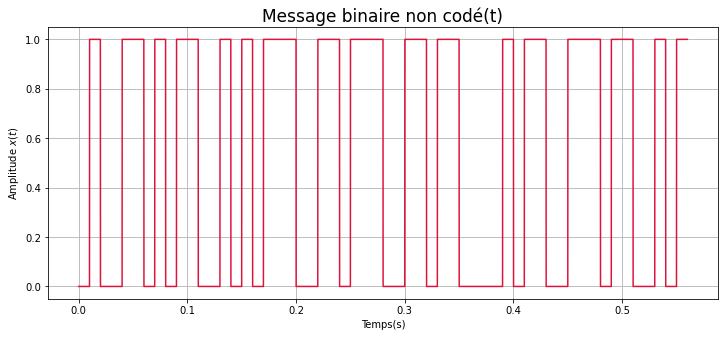

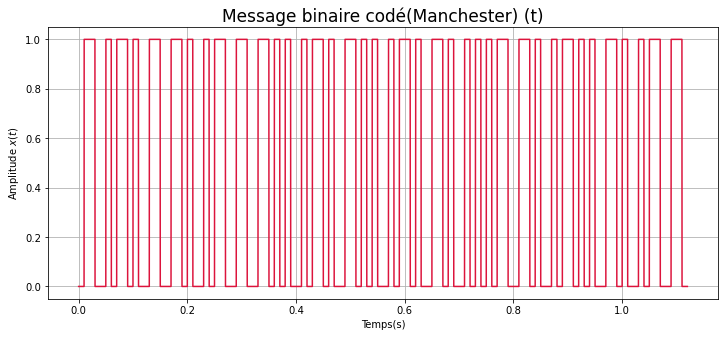

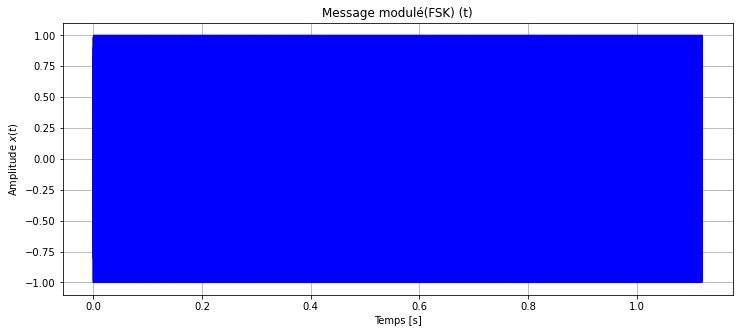

In [1]:
#------------- Importation des modules -----------------


import pyaudio   #Importion du module PyAudio (émettre le son)
import wave      #Importion du module wave (lire, telecharger ou jouer un fichier Wav)
import numpy as np #Importion du module numpy (taleau à deux dimensions, PI, fonction maths (sin, cos, etc...))
import matplotlib.pyplot as plt #Importion du module matplotlib.pyplot (Graphique)
import binascii   #Importion du module binascii (conversion binaire / ascii, )
from os.path import abspath   #Importion du module abspath permettant de donner l'endroit ou se trouve un fichire (quand il est téléchargé par exemple)
import time  #Importion du module(créer des pauses dans le programme)
import soundfile as sf      #Importion du module soundfile permettant de traiter des fichiers sons
import sounddevice as sd    #Importion du module sounddevice fournissant des fonctions pour lire et enregistrer des tableaux numpy contenant des signaux audios
import scipy.io.wavfile #Importation tu module scipy.io permettant d'obtenir de nombreux modules, classes et fonctions disponibles pour lire et écrire des données dans une variété de formats de fichiers
import scipy.signal as sig  #Importation du module scipy.signal permettant de filtrer une séquence de données à l'aide d'un filtre numérique
from scipy.signal import butter, filtfilt, lfilter #Importation des modules butter, filtfilt et lfilter du module scipy.signal (nous avons rajouté cette ligne car en l'enlevant, le programme ne fonctionnait plus, dû à un bug)
from functools import partial #Importation du module partials de functools permettant d'appeler un objet partiel (ce sont des objets appelables créees par le module partial)


#--------------- Création de la fonction convertisseuse binaire / ASCII ----------------


p = pyaudio.PyAudio()  #Activation du module PyAudio
Clé = '10011'    #Définition de la clé CRC

def Convertisseur(Convert):  #Création d'une fonction convertissant le message entré en binaire (caractère par caractère, retour à la ligne pour chaque caractère)
    for lettre in Convert:    #Utilisation d'une boucle afin de convertir chaque caractère en binaire
        print("La valeur binaire de {} est {:08b}".format(lettre, ord(lettre)))   #Affichage d'un message puis de chaque lettre du message entré converti en binaire, en écriture python.
                #L'écriture en binaire de python est différente de celle en mathématiques, elle peut soit commencer par "0b" soit par "01" ou deux "011". Dans notre cas, chaque caractere en binaire commence par "11" ou "1" car c'est le caractère ASCII qui est converti (et non pas un chiffre pour 1 par exemple). Cependant, la valeur binaire reste fidèle à sa valeur d'origine. Si la fonction utilisée avait été bin(decimal), elle serait écrit tel que "0b00"              
    
def xor(a, b): # Création d'une fonction contenant les résultats et ayant 2 paramètres
   
    # Initialiser le résultat
    result = [] 
   

    for i in range(1, len(b)): 
        if a[i] == b[i]:         # Si les bits sont idem, alors XOR vaut 0
            result.append('0') 
        else: 
            result.append('1')  #Sinon, XOR vaut 1
   
    return ''.join(result)   #Retourne le résultat
   

def mod2div(divident, divisor):  # Division euclidienne pour le crc
   
    pick = len(divisor) #la variable pick prend en valeur la taille du tableau du paramètre divisor
    tmp = divident[0 : pick] 
   
    while pick < len(divident): 
   
        if tmp[0] == '1': 

            tmp = xor(divisor, tmp) + divident[pick] 
   
        else:    
            tmp = xor('0'*pick, tmp) + divident[pick] 
    
        pick += 1
    
    if tmp[0] == '1': 
        tmp = xor(divisor, tmp) 
    else: 
        tmp = xor('0'*pick, tmp) 
   
    checkword = tmp 
    return checkword   #Retourne le résultat de la division
    

# Fonction d'encodage 
# On lui donne les données (augmentée de N-bits 0 qui est la taille de la clé) et la clé (Clé) qui (polynome générateur)

def encodeData(data, Clé): # Définition de la fonction d'encodage 
    l_Clé = len(Clé) 

    appended_data = data + '0'*(l_Clé-1) 
    remainder = mod2div(appended_data, Clé) 
   

    codeword = data + remainder 
    return codeword
            
                 
Fe = 47000      #Fréquence d'échantillonage (2 x fmax)
Channels = 2        #Nombre de canal de sortie du son
Chunk = 1024       #Nombre de Chunk du son
baud = 100      # Débit du canal de transmission en bit/s (nous avons choisi 10 car cela sera suffisant pour un fichier texte simple et pour éviter les pertes de données)
volume = 1     # Volume (entre 0 et 1)


#---------- Création du message à envoyer ----------------


Message = input(str("Veuillez indiquer votre message : "))  #Message entré par l'agent


#-------------- Conversion du message en binaire grâce à la fonction définie ci-dessus -------------


Convertisseur(Message)    #Utilisation de la fonction convertissant chaque lettre en binaire

Msg_bin = ''.join(format(ord(lettres), '08b') for lettres in Message)  #Convertit tous les caractères en une phrase en binaire en alignant chaque caractère binaire
print("Le message en binaire de ", Message, "est ", Msg_bin)   #Affiche le message entré par l'agent et sa correspondance en binaire
print ("La clé CRC est:", Clé)
 # On réalise l'encodage CRC  

Liste_bin = []                       #Création d'une liste contenant chaque caractère en binaire
for x in Msg_bin:                       #Pour chaque lettre du message:
    Liste_bin.extend(str(x))             #Le caractère correspondant arrive dans la dernière case de la liste
    data_crc = encodeData(x, Clé )
Liste_bin = list(map(int, Liste_bin))    #Conversion des valeurs du tableau (string) en entier (int)


Nbits = len(Liste_bin)    #Nombre de bits initial (taille du message entré en binaire)
Ns = int(Fe/baud)        #Nombre de symboles par bit (Fréq d'echan / Débit binaire) 
N = int(Nbits * Ns)       #Nombre de bits total à moduler (Nombre de symboles par bit * Nombre de bits)
  
    
Tab = np.repeat(Liste_bin, Ns)        #Génération du message dupliqué
Temps = np.linspace(0.0, N/Fe, N)    #Génération du vecteur temps 


# ------ Affichage d'un graphique du message en binaire --------

 
plt.figure(figsize=(12,5))  # Définition de la taille du graphique
plt.title ('Message binaire non codé(t)', color = 'black', fontsize=17) # Définition du titre de graphique
plt.grid(True)                  # Affichage de la grille
plt.xlabel("Temps(s)")           #Définition du nom de l'axe des abscisses
plt.ylabel("Amplitude $x(t)$")     #Définition du nom de l'axe des ordonnées
plt.plot(Temps, Tab, color = 'crimson')     #Traçage de la courbe (Liste des valeurs binaires en fonction du vecteur temps)
plt.show()    #Affichage du graphique


# -------- Codage de l'information ----------

Liste_2bin = []                 #Création d'une liste contenant les valeurs codées
for c in Msg_bin:                #Pour chaque valeur binaire du message converti précedemment :
    Liste_2bin.extend(str(2*c))          #La liste prend les même valeurs binaires de de la liste précédente 2 fois
Liste_2bin = list(map(int, Liste_2bin))  #Conversion des valeurs du tableau (string) en entier (int)

x = 2*Nbits+1
y = 1

while x!=y:   #Tant que x n'est pas égal à y
    if Liste_2bin[y] == 0:   #On change une valeur du tableau sur 2 (les 1 passent à 0 et les 0 passent à 1) afin de respecter le codage Manchester
        Liste_2bin[y] = 1
    elif Liste_2bin[y] == 1:
        Liste_2bin[y] = 0
    y += 2
    
       
Temps2 = np.linspace(0.0, 2*N/Fe, N*2)    #Définition d'un deuxième vecteur temps
List2_duplique = np.repeat(Liste_2bin, Ns)   #Duplication de la liste des valeurs binaires codées pour les afficher dans un graphique (sans les utiliser par la suite !)


# ------ Affichage d'un graphique du message en binaire codé --------


plt.figure(figsize=(12,5))   # Définition de la taille du graphique
plt.title ('Message binaire codé(Manchester) (t)', color = 'black', fontsize=17) # Définition du titre de graphique
plt.grid(True)   # Affichage de la grille
plt.xlabel("Temps(s)") #Définition du nom de l'axe des abscisses
plt.ylabel("Amplitude $x(t)$") #Définition du nom de l'axe des ordonnées
plt.plot(Temps2, List2_duplique, color = 'crimson') #Traçage de la courbe (Liste des valeurs binaires codées en fonction du vecteur temps)
plt.show()   #Affichage du graphique


#----------- Modulation du message codé ------------


Temps3 = np.linspace(0.0, Ns/Fe, Ns)      #Définition du vecteur temps 3 (pour les porteuses)

A1 = 1    #Amplitude de la porteuse 1
A2 = 1    #Amplitude de la porteuse 2

Fp1 = 23000     #Fréquence de la porteuse 1
Fp2 = 22000     #Fréquence de la porteuse 2

P1 = [A1*np.sin(2*np.pi*Fp1*T) for T in Temps3]     # Porteuse du bit  1  
P2 = [A2*np.sin(2*np.pi*Fp2*T) for T in Temps3]     # Porteuse du bit 0

Msg_FSK = []       #Création d'un tableau nommé Msg_FSK

for val in range(0,len(Liste_2bin)):  #Modulation en FSK 
    if (Liste_2bin[val] == 1):
        Msg_FSK.extend(P1)
    if (Liste_2bin[val] == 0):
        Msg_FSK.extend(P2)
    
plt.figure (figsize = (12,5))
plt.grid(True)
plt.plot(Temps2, Msg_FSK, color = 'blue')
plt.xlabel('Temps [s]')
plt.ylabel("Amplitude $x(t)$")
plt.title('Message modulé(FSK) (t)')
plt.show()

#------- Téléchargement et émission du son du message modulé --------

donnée = Msg_FSK   # La variable donnée prend les valeurs du tableau ayant les valeurs du message modulé en FSK et codé en Manchester
sf.write('FSK.wav', donnée, Fe) #Écriture des données dans un fichier qui se crée avec le nom "FSK.wav"
time.sleep(0.5)  #Pause de 0.5 seconde
Fe, Msg_FSK = scipy.io.wavfile.read('FSK.wav') #Convertion des données afin qu'elles puissent être produite de manière sonore par Python 
sd.play(donnée, Fe)  # Émission du son (la fréquence dépend des porteuses et est audible malgré les hautes fréquences à cause de Python)
p.terminate()  # Arrêt du module PyAudio.


In [2]:
# --------- Création de la fonction décodage --------


def decodeData(data_crc, Clé):   #Création de la fonction decodeData qui permettra de recomparer les clés CRC afin de détecter si il ya eu une erreur 
   
    l_Clé = len(Clé)  #La variable l_clé prend en valeur la taille du tableau clé
    appended_data = data_crc + '0'*(l_Clé-1) 
    remainder = mod2div(appended_data, Clé) 
   
    return remainder 



# ------------ Démodulation -----------------

  
T = np.arange(0.0, 2*N)/Fe  #Création d'un vecteur temps servant pour les porteuses afin de démoduler le message

Fp1 = 23000     #Fréquence de la porteuse 1
Fp2 = 21000     #Fréquence de la porteuse 2

S1 = A1*np.sin(2*np.pi*Fp1*T)  #Utilisation de la même formule des porteuses que pour envoyer le message (seul le vecteur temps change)
S2 = A2*np.sin(2*np.pi*Fp2*T)  #Utilisation de la même formule des porteuses que pour envoyer le message (seul le vecteur temps change)

bit1 = Msg_FSK*S1   #La variable bit1 prend en valeur le produit de Msg_FSK et S1
bit0 = Msg_FSK*S2   #La variable bit0 prend en valeur le produit de Msg_FSK et S2
   
y1 = []  #Création d'un tableau y1
y2 = []  #Création d'un tableau y2

z=0
for z in range(0, 2*N, Ns): 
    y1.append(np.trapz(bit1[z:z+Ns],T[z:z+Ns]))  #Dans la dernière case du tableau de y1, le programme ajoute la formule ci contre 
    y2.append(np.trapz(bit0[z:z+Ns],T[z:z+Ns]))  #Dans la dernière case du tableau de y2, le programme ajoute la formule ci contre 

comparateur = (np.array(y1) > np.array(y2))  #Création d'un comparateur qui compare chaque valeur du tableau de y1 par rapport à y2


# ------------ Liste pour stocker le message démodulé -----------------

Message_démodule = []  #Création d'un tableau 

for ii in range (0, len(comparateur)):
    
    if comparateur [ii] == False:   #Si la case du tableau est négative alors la dernière case du tableau prend 0
        Message_démodule.extend([int(0)])
        
    if comparateur [ii] == True:
         Message_démodule.extend([int(1)]) #Si la case du tableau est positive alors la dernière case du tableau prend 1
        
             
print("Le message binaire codé est:\n ", Liste_2bin)
print("Le message binaire démodulé est:\n ", Message_démodule)

# --------------- Calculer si erreur de réception -------------------


Erreur = []
Erreur = (np.array(Liste_2bin) == np.array(Message_démodule))  #Comparaison de la liste du message codé et du message démodulé

print ("Système de détection d'erreur :\n", Erreur) #Affichage des erreurs (True = aucune erreur et False = erreur)

       
# -------------- Décodage du message -----------------


Message_decode = [] #Création d'un tableau


for w in range (0, len(Message_démodule), 2 ):#Fonction for de 0 jusque la fin du message démodulé avec un pas de 2 puisqu'on utilise un décodage synchrone Manchester
    Message_decode.extend(str(Message_démodule[w])) #La dernière valeur du tableau prend une valeur sur 2 du message démodulé afin de respecter le codage Manchester
    
Message_decode = list(map(int, Message_decode))    #Convertion de la liste de string en entier

check = decodeData(str(Message_decode), Clé) #La variable check prend la valeur de la fonction decodedata avec en paramètre Message_decode et la clé CRC


# -------- Conversion binaire ASCII ---------


bin_data = ""  #Création d'une variable pouvant contenir des caractères
for elem in Message_decode:   #Pour chaque élement dans le tableau message_decode
    bin_data += str(elem)  #Bin_data prend la valeur du tableau en string
    
data_reçu =' ' #Création d'une variable pouvant contenir des caractères

def BinaryToDecimal(binary):  #Création d'une fonction pouvant convertir le mesasge binaire en décimal
    binary1 = binary #La variable binary1 prend la valeur binary
    decimal, i, n = 0, 0, 0 #initialisation des variables
    
    while(binary != 0): #Tant que binary n'est pas égal à 0
        dec = binary % 10  #La variable dec prend binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return (decimal) #Retourne la valeur finale

for i in range(0, len(bin_data), 8): 
    temp_data = int(bin_data[i+1:i+8]) #Utilisation de temp_data pour obtenir la valeur décimale correspondante de (temp_data)
      
    decimal_data = BinaryToDecimal(temp_data) #La variable decimal_data prend la BinaryToDecimal valeur de temp_data après être passé dans la fonction

    

    # Décodage de la valeur décimale renvoyée par la fonction BinarytoDecimal en utilisant char(decimal_data)
    data_reçu = data_reçu + chr(decimal_data) 


print("Le message reçu est :", data_reçu) #Affichage du message reçu, démodulé, décodé et reconverti en ASCII


print("Le reste de la division après décodage est ->" + check)  #Affichage de check, du reste de la division après le décodage
temp = "0" * (len(Clé) - 1) #Création d'une variable temps pour vérifier la valeur CRC


if check == temp: #Si la variable check a la même valeur que la variable temp
    print("Les données -> "+ Msg_bin + " <- sont reçues !") #Affichage de la vérifiaction CRC.

Le message binaire codé est:
  [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
Le message binaire démodulé est:
  [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
Système de détection d'erreur :
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  